# Konwolucyjne Sieci Neuronowe (CNN)

CNN-y to klasa sieci neuronowych zaprojektowana do pracy z danymi o strukturze siatki (obrazami, spektrogramami, sygnałami 1D). 


## Co to jest konwolucja?

### Intuicja

**Konwolucja** (ang. *convolution*) to działanie matematyczne, w którym **nakładamy małą "maskę" (filtr, jądro) na dane wejściowe (np. obraz, sygnał)** i w każdym miejscu liczymy ważoną sumę wartości.

* W przypadku obrazów filtr może być np. macierzą 3×3.
* Przesuwamy go po obrazie „okienko po okienku”.
* Wynik w danym miejscu mówi, **jak bardzo lokalny fragment obrazu pasuje do wzorca w filtrze**.

To właśnie podstawa **konwolucyjnych sieci neuronowych (CNN)**.

---

### Matematyczna definicja (dla sygnału 1D)

Konwolucja dwóch funkcji \(f\) i \(g\):

$$
(f * g)(t) = \sum_{\tau} f(\tau) \cdot g(t - \tau)
$$

* \(f\) – dane wejściowe (np. sygnał, obraz zapisany jako ciąg liczb),
* \(g\) – filtr (jądro konwolucji),
* wynik to **nowa funkcja opisująca stopień dopasowania filtru do danych** w każdej pozycji.


### Przykład prosty (1D)

#### sygnały

$signal_1 = [1, 2, 3, 4, 5]$

$signal_2 = [1, 2, 5, 6, 7]$

#### Filtry:

* **A.** $[1, -1]$  → liczy *bieżący − następny*
* **B.** $[-1, 1]$  → liczy *następny − bieżący*

---

#### Obliczenia krok po kroku

##### dla $signal_1$

###### filtr $A$

* $1-2=-1$
* $2-3=-1$
* $3-4=-1$
* $4-5=-1$

→ **wynik:** $[-1, -1, -1, -1]$

###### filtr $B$

* $-1+2=1$
* $-2+3=1$
* $-3+4=1$
* $-4+5=1$
  
→ **wynik:** $[1, 1, 1, 1]$

##### dla $signal_2$

###### filtr $A$

* $1-2=-1$
* $2-5=-3$
* $5-6=-1$
* $5-7=-1$

→ **wynik:** $[-1, -3, -1, -1]$

###### filtr $B$

* $-1+2=1$
* $-2+5=3$
* $-5+6=1$
* $-6+7=1$
  
→ **wynik:** $[1, 3, 1, 1]$

### Przykład w obrazie

Podaję przykład konwolucji 2D na obrazie 4x4

#### Obraz 4x4:

$$
\begin{bmatrix}
1 & 2 & 0 & 1 \\
4 & 5 & 6 & 2 \\
7 & 8 & 9 & 3 \\
1 & 0 & 2 & 4
\end{bmatrix}
$$

#### Filtr (krawędzie poziome):

$$
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}
$$

***

#### Sposób obliczeń:

Filtr 3x3 przesuńmy po obrazie 4x4 z krokiem 1, obliczając ważoną sumę (element-wise multiplication) dla każdego 3x3 fragmentu obrazu. Wynik będzie macierzą 2x2, bo:

- $$4-3+1 = 2$$ po wymiarach obrazu.

***

#### Pozycje filtra, obliczenia i wyniki:

1. Pozycja (górny-lewy):

Wycinamy fragment obrazu:

$$
\begin{bmatrix}
1 & 2 & 0 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$$

Mnożenia i sumowanie:

$$
(-1)*1 + (-1)*2 + (-1)*0 + 0*4 + 0*5 + 0*6 + 1*7 + 1*8 + 1*9 = -1 - 2 + 0 + 0 + 0 + 0 + 7 + 8 + 9 = 21
$$

2. Pozycja (górny-prawy):

Wycinamy fragment:

$$
\begin{bmatrix}
2 & 0 & 1 \\
5 & 6 & 2 \\
8 & 9 & 3 
\end{bmatrix}
$$

Mnożenia i sumowanie:

$$
(-1)*2 + (-1)*0 + (-1)*1 + 0*5 + 0*6 + 0*2 + 1*8 + 1*9 + 1*3 = -2 + 0 - 1 + 0 + 0 + 0 + 8 + 9 + 3 = 17
$$

3. Pozycja (dolny-lewy):

Wycinamy fragment:

$$
\begin{bmatrix}
4 & 5 & 6 \\
7 & 8 & 9 \\
1 & 0 & 2 
\end{bmatrix}
$$

Mnożenia i sumowanie:

$$
(-1)*4 + (-1)*5 + (-1)*6 + 0*7 + 0*8 + 0*9 + 1*1 + 1*0 + 1*2 = -4 -5 -6 + 0 + 0 + 0 + 1 + 0 + 2 = -12
$$

4. Pozycja (dolny-prawy):

Wycinamy fragment:

$$
\begin{bmatrix}
5 & 6 & 2 \\
8 & 9 & 3 \\
0 & 2 & 4
\end{bmatrix}
$$

Mnożenia i sumowanie:

$$
(-1)*5 + (-1)*6 + (-1)*2 + 0*8 + 0*9 + 0*3 + 1*0 + 1*2 + 1*4 = -5 -6 -2 + 0 + 0 + 0 + 0 + 2 + 4 = -7
$$



#### Wynik konwolucji (macierz 2x2):

$$
\begin{bmatrix}
21 & 17 \\
-12 & -7
\end{bmatrix}
$$

#### Wniosek:

- Pozytywne wartości w górnym wierszu wskazują na obecność krawędzi poziomych o rosnącym natężeniu.
- Wartości ujemne w dolnym wierszu wskazują np. spadek jasności lub kierunek krawędzi przeciwny.


In [1]:
import numpy as np

image = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
], dtype=float)

kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1],
], dtype=float)

output = np.zeros((image.shape[0] - kernel.shape[0] + 1, image.shape[1] - kernel.shape[1] + 1))

for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        patch = image[i:i + kernel.shape[0], j:j + kernel.shape[1]]
        output[i, j] = np.sum(patch * kernel)

output

array([[ 3.,  3.,  3.],
       [ 0.,  0.,  0.],
       [-3., -3., -3.]])

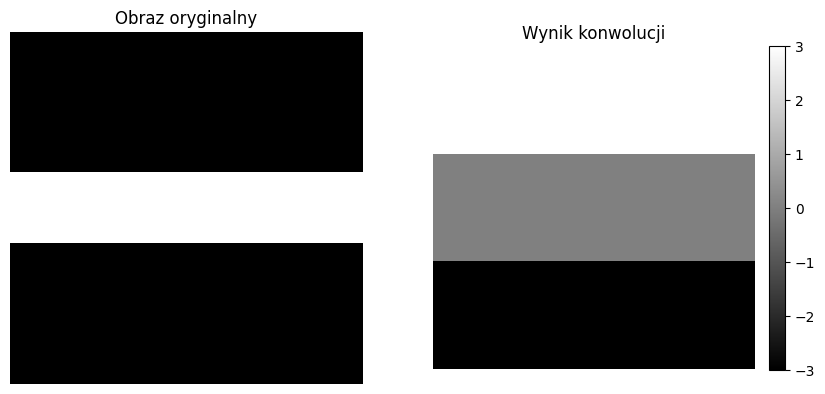

In [2]:
import matplotlib.pyplot as plt
# Rysowanie obrazów
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Oryginalny obraz
ax[0].imshow(image, cmap='gray', interpolation='none')
ax[0].set_title('Obraz oryginalny')
ax[0].axis('off')

# Wynik konwolucji
im = ax[1].imshow(output, cmap='gray', interpolation='none')
ax[1].set_title('Wynik konwolucji')
ax[1].axis('off')

# Dodanie skali kolorów do wyniku
fig.colorbar(im, ax=ax[1], fraction=0.046, pad=0.04)

plt.show()

* nad linią wychodzi jasno (bo kernel wykrywa przejście 0 → 1),

* w samej linii wychodzi wartości bliższe 0 (szaro),

* pod linią wychodzi ciemno (bo kernel wykrywa przejście 1 → 0).

## W sieciach neuronowych

* Filtry nie są wybierane ręcznie (jak w klasycznym przetwarzaniu obrazów), tylko **uczone automatycznie w trakcie trenowania**.
* Dlatego CNN potrafią same nauczyć się rozpoznawać **krawędzie, tekstury, a potem całe obiekty**.

---

📌 **Podsumowanie:**
Konwolucja to sposób „przesuwania filtra po danych” i liczenia, jak mocno lokalny fragment pasuje do wzorca w tym filtrze. Dzięki temu CNN potrafią wyłapywać lokalne cechy, np. krawędzie, rogi czy bardziej złożone struktury.


## Dlaczego warto używać CNN?
- Warstwy konwolucyjne uczą się filtrów wykrywających lokalne wzorce (krawędzie, tekstury, części obiektów).
- Wykorzystują współdzielenie wag: ten sam filtr przesuwa się po całym obrazie, dzięki czemu liczba parametrów jest mniejsza niż w gęstych sieciach.
- Zachowują informację przestrzenną, co jest kluczowe przy analizie obrazów i sygnałów.
- Naturalnie obsługują obrazy wielokanałowe (np. RGB) poprzez sumowanie konwolucji wykonanych na każdym kanale wejściowym.

## Kluczowe parametry warstwy konwolucyjnej
| Parametr | Co oznacza? | Efekt na wynik |
| --- | --- | --- |
| `in_channels` / `out_channels` | Liczba kanałów wejściowych i filtrów wyjściowych | Określają jak wiele map cech trafia do kolejnych warstw |
| `kernel_size` | Wysokość i szerokość filtru (np. 3×3) | Większe filtry widzą szerszy kontekst, ale zwiększają liczbę parametrów |
| `stride` | Krok przesuwania filtru | Większy krok zmniejsza rozdzielczość mapy cech |
| `padding` | Dodawanie pikseli wokół obrazu | Pozwala zachować rozmiar wyjścia i nie tracić informacji na krawędziach |
| `dilation` | „Rozciągnięcie” filtru poprzez wstawianie zer | Zwiększa pole widzenia bez zwiększania liczby parametrów |

📌 W praktyce: w `11-MNIST-with-CNN.ipynb` używamy `kernel_size=3`, `stride=1`, `padding=0`. To oznacza, że rozmiary map cech zmniejszają się po każdej konwolucji.

### Jak policzyć rozmiar wyjścia?
Dla pojedynczej konwolucji 2D korzystamy ze wzoru:

$$\text{out} = \left\lfloor \frac{\text{size} + 2\cdot\text{padding} - \text{dilation} \cdot (\text{kernel} - 1) - 1}{\text{stride}} + 1 \right\rfloor$$

W przypadku poolingu (np. `MaxPool2d(2, 2)`) stosujemy ten sam wzór, ale `kernel` i `stride` pochodzą z warstwy pooling.

Poniżej krótka funkcja pomocnicza, dzięki której możesz szybko oszacować rozmiar po konwolucji lub poolingu.

In [3]:
def conv_output_size(size, kernel_size, stride=1, padding=0, dilation=1):
    return ((size + 2 * padding - dilation * (kernel_size - 1) - 1) // stride) + 1

height = conv_output_size(28, kernel_size=3, stride=1, padding=0)
height_pool = conv_output_size(height, kernel_size=2, stride=2)
height, height_pool

(26, 13)

Widzimy, że 28×28 po konwolucji 3×3 (bez paddingu) zamienia się w 26×26. Po max poolingu 2×2 ze stride 2 rozmiar spada do 13×13. Te obliczenia przydadzą się przy analizie etapów w notatniku MNIST.

## 📌 Pooling w sieciach konwolucyjnych (CNN)

### 🔹 Co to jest pooling?

Pooling to operacja, która **zmniejsza rozmiar danych (map cech)** powstających po konwolucjach.
Działa w ten sposób, że przesuwamy **małe okienko** (np. 2×2, 3×3) po obrazie i w każdym takim fragmencie stosujemy prostą funkcję, np.:

* **max pooling** → wybiera największą wartość,
* **average pooling** → liczy średnią,
* **global average pooling** → redukuje całą mapę do jednej wartości.

---

### 🔹 Po co stosuje się pooling?

1. **Redukcja wymiaru danych** – mniejsze obrazy = mniej obliczeń i parametrów.
2. **Odporność na przesunięcia** – jeśli cecha przesunie się np. o 1 piksel, pooling sprawia, że model nadal ją rozpozna.
3. **Wydobywanie najważniejszych informacji** – np. max pooling „podkreśla” najsilniejszy sygnał w obszarze.

---

### 🔹 Przykład max poolingu 2×2

Weźmy fragment obrazu:

$$
\begin{bmatrix}
1 & 3 \
2 & 4
\end{bmatrix}
$$

* Max pooling → **4**
* Average pooling → $(1+2+3+4)/4 = 2.5$

---

### 🔹 Pooling w praktyce CNN

* **Klasyczne sieci (LeNet, AlexNet, VGG)** → stosowały regularny max pooling 2×2 po każdej konwolucji.
* **Nowsze sieci (ResNet, EfficientNet, itp.)** → często zastępują pooling **konwolucjami ze stride > 1** albo używają **global average pooling** na końcu.

---

📌 **Podsumowanie:**
Pooling = **zmniejszanie obrazu w kontrolowany sposób**, aby:

* uprościć obliczenia,
* uodpornić model na małe przesunięcia,
* zachować najważniejsze informacje.

### przykłady kodu:

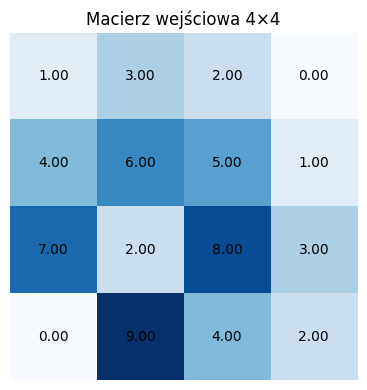

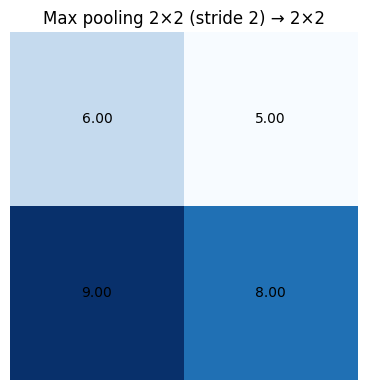

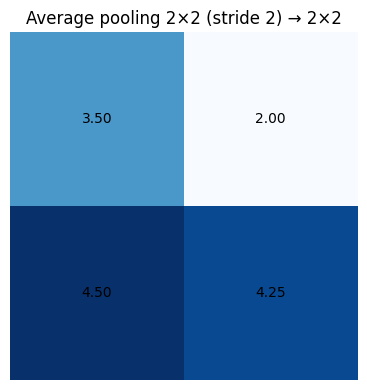

Wynik max poolingu:
 tensor([[6., 5.],
        [9., 8.]])
Wynik average poolingu:
 tensor([[3.5000, 2.0000],
        [4.5000, 4.2500]])


In [4]:
import torch
import matplotlib.pyplot as plt

# --- Dane wejściowe (4x4) ---
inp = torch.tensor([
    [1., 3., 2., 0.],
    [4., 6., 5., 1.],
    [7., 2., 8., 3.],
    [0., 9., 4., 2.]
])

# --- Warstwy poolingu ---
max_pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
avg_pool = torch.nn.AvgPool2d(kernel_size=2, stride=2)

# --- Przygotowanie tensora (PyTorch oczekuje 4D: N, C, H, W) ---
inp_4d = inp.unsqueeze(0).unsqueeze(0)  # shape: (1, 1, 4, 4)

# --- Zastosowanie poolingu ---
max_pooled = max_pool(inp_4d).squeeze().detach()
avg_pooled = avg_pool(inp_4d).squeeze().detach()

# --- Funkcja pomocnicza do rysowania ---
def show_matrix(mat, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(mat, cmap="Blues", interpolation="none")
    plt.title(title)
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            plt.text(j, i, f"{mat[i, j].item():.2f}",
                     ha="center", va="center", color="black")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# --- Wyświetlanie ---
show_matrix(inp, "Macierz wejściowa 4×4")
show_matrix(max_pooled, "Max pooling 2×2 (stride 2) → 2×2")
show_matrix(avg_pooled, "Average pooling 2×2 (stride 2) → 2×2")

print("Wynik max poolingu:\n", max_pooled)
print("Wynik average poolingu:\n", avg_pooled)


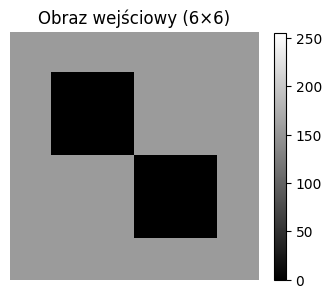

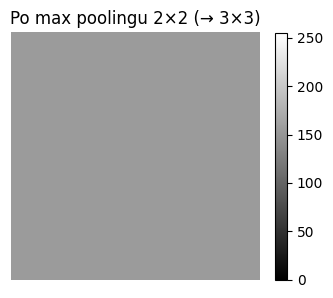

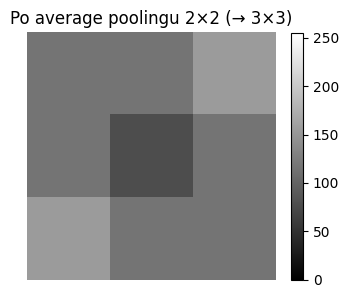

Wynik max poolingu:
 [[155. 155. 155.]
 [155. 155. 155.]
 [155. 155. 155.]]
Wynik average poolingu:
 [[116.25 116.25 155.  ]
 [116.25  77.5  116.25]
 [155.   116.25 116.25]]


In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# --- Obraz wejściowy 6x6 w skali szarości ---
img = np.array([
    [0,   0,   0,   0,   0,   0],
    [0, 155, 155,   0,   0,   0],
    [0, 155, 155,   0,   0,   0],
    [0,   0,   0, 155, 155,   0],
    [0,   0,   0, 155, 155,   0],
    [0,   0,   0,   0,   0,   0]
], dtype=np.float32)

img = np.abs(img-155)

# --- Tensor do PyTorcha (N, C, H, W) ---
img_tensor = torch.tensor(img).unsqueeze(0).unsqueeze(0)

# --- Pooling ---
max_pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
avg_pool = torch.nn.AvgPool2d(kernel_size=2, stride=2)

max_pooled = max_pool(img_tensor).squeeze().numpy()
avg_pooled = avg_pool(img_tensor).squeeze().numpy()

# --- Funkcja do rysowania z colorbarem ---
def show_matrix(mat, title):
    plt.figure(figsize=(4,4))
    im = plt.imshow(mat, cmap="gray", vmin=0, vmax=255)
    plt.title(title)
    plt.colorbar(im, shrink=0.8)
    plt.axis("off")
    plt.show()

# --- Wizualizacja ---
show_matrix(img, "Obraz wejściowy (6×6)")
show_matrix(max_pooled, "Po max poolingu 2×2 (→ 3×3)")
show_matrix(avg_pooled, "Po average poolingu 2×2 (→ 3×3)")

print("Wynik max poolingu:\n", max_pooled)
print("Wynik average poolingu:\n", avg_pooled)


## 7. Minimalny model CNN w PyTorch
Model poniżej jest uproszczoną wersją sieci, którą wykorzystamy w zadaniu z MNIST. Składa się z dwóch bloków konwolucyjnych i części gęstej.

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 7 * 7, 120)
        self.fc2 = nn.Linear(120, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()
model

SimpleCNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)

## Śledzenie kształtów w architekturze MNIST
W notatniku `11-MNIST-with-CNN.ipynb` sieć ma dwie warstwy konwolucyjne (`Conv2d(1, 6, 3, 1)` i `Conv2d(6, 16, 3, 1)`) przed dwoma warstwami gęstymi. Poniżej sprawdzamy, jak zmieniają się wymiary tensora dla pojedynczego obrazu 28×28.


In [7]:
import torch
import torch.nn.functional as F
import torch.nn as nn

x = torch.randn(1, 1, 28, 28)
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

print('Wejście:', x.shape)
x = F.relu(conv1(x))
print('Po conv1 (bez paddingu):', x.shape)
x = F.max_pool2d(x, 2, 2)
print('Po max poolingu 2x2:', x.shape)
x = F.relu(conv2(x))
print('Po conv2:', x.shape)
x = F.max_pool2d(x, 2, 2)
print('Po drugim poolingu:', x.shape)
x = torch.flatten(x, 1)
print('Po spłaszczeniu:', x.shape)


Wejście: torch.Size([1, 1, 28, 28])
Po conv1 (bez paddingu): torch.Size([1, 6, 26, 26])
Po max poolingu 2x2: torch.Size([1, 6, 13, 13])
Po conv2: torch.Size([1, 16, 11, 11])
Po drugim poolingu: torch.Size([1, 16, 5, 5])
Po spłaszczeniu: torch.Size([1, 400])


Otrzymujemy wymiary dokładnie takie, jak w ćwiczeniu: `28→26→13→11→5`, a po spłaszczeniu `5×5×16 = 400` elementów. Dzięki temu wiesz, skąd biorą się rozmiary wejść warstw liniowych (`Linear(5*5*16, 120)`).

Zwróć uwagę na:
- Liczbę kanałów wejściowych `1` (obrazy MNIST są w skali szarości).
- W tej wersji modelu padding utrzymuje rozmiary po konwolucjach, dlatego 28×28 → 14×14 → 7×7 po poolingach.
- W notatniku treningowym (bez paddingu) poprzeczne wymiary maleją do 26×26, 13×13, 11×11 i 5×5 – to dlatego w warstwie liniowej pojawia się `5*5*16` neuronów wejściowych.
- Ostatnia warstwa gęsta generuje 10 logitów odpowiadających klasyfikowanym cyfrom.

Te obserwacje pomagają dopasować architekturę do danych w `11-MNIST-with-CNN.ipynb`.


## Typowy blok CNN

1. Warstwa konwolucyjna (`Conv2d` / `Conv2D`).
2. Funkcja aktywacji (zwykle ReLU).
3. Pooling (opcjonalnie po 1-2 warstwach).
4. Normalizacja (np. BatchNorm) w celu stabilizacji treningu.
5. Na końcu sieci z reguły flattenujemy mapy cech i dołączamy 1-2 warstwy gęste do klasyfikacji.


## Embeddingi i CNN-y

Chociaż CNN-y kojarzą się głównie z obrazami, warto pamiętać, że we wcześniejszym module korzystaliśmy z embeddingów dla danych kategorycznych. 
Możemy je łączyć, np. w modelach łączących dane obrazowe (CNN) z metadanymi tabelarycznymi (embeddingi), a następnie łączyć reprezentacje w części gęstej.

## Materiały dodatkowe:

https://pl.wikipedia.org/wiki/Konwolucyjna_sie%C4%87_neuronowa

https://www.cs.put.poznan.pl/alawrynowicz/SI_ML_CNN_2020_lawrynowicz.pdf

https://manduk.ai/pl/konwolucyjne-sieci-neuronowe-klasyfikacja-obrazow-czesc-1/

